# Import libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,accuracy_score
from math import pi

# EDA

In [65]:
df = pd.read_csv("data/Student Depression Dataset.csv")
df.head(3)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [66]:
df.shape

(27901, 18)

In [67]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [69]:
df.duplicated().sum()

np.int64(0)

In [96]:
df_clean["Degree"].value_counts()

Degree
Class 12    6080
B.Ed        1864
B.Com       1506
B.Arch      1477
BCA         1432
MSc         1186
B.Tech      1152
MCA         1042
M.Tech      1022
BHM          922
BSc          885
M.Ed         821
B.Pharm      809
M.Com        733
BBA          695
MBBS         695
LLB          671
BE           612
BA           599
M.Pharm      581
MD           569
MBA          562
MA           542
PhD          521
LLM          481
MHM          191
ME           185
Others        35
Name: count, dtype: int64

In [70]:
def clean_df(df):
    df = df[df["Profession"] == "Student"]
    df = df.drop(columns=["id", "City", "Job Satisfaction", "Profession", 'Work Pressure'])

    return df

In [71]:
df_clean = clean_df(df)

In [72]:
df_clean.shape

(27870, 13)

In [73]:
df_clean.columns

Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

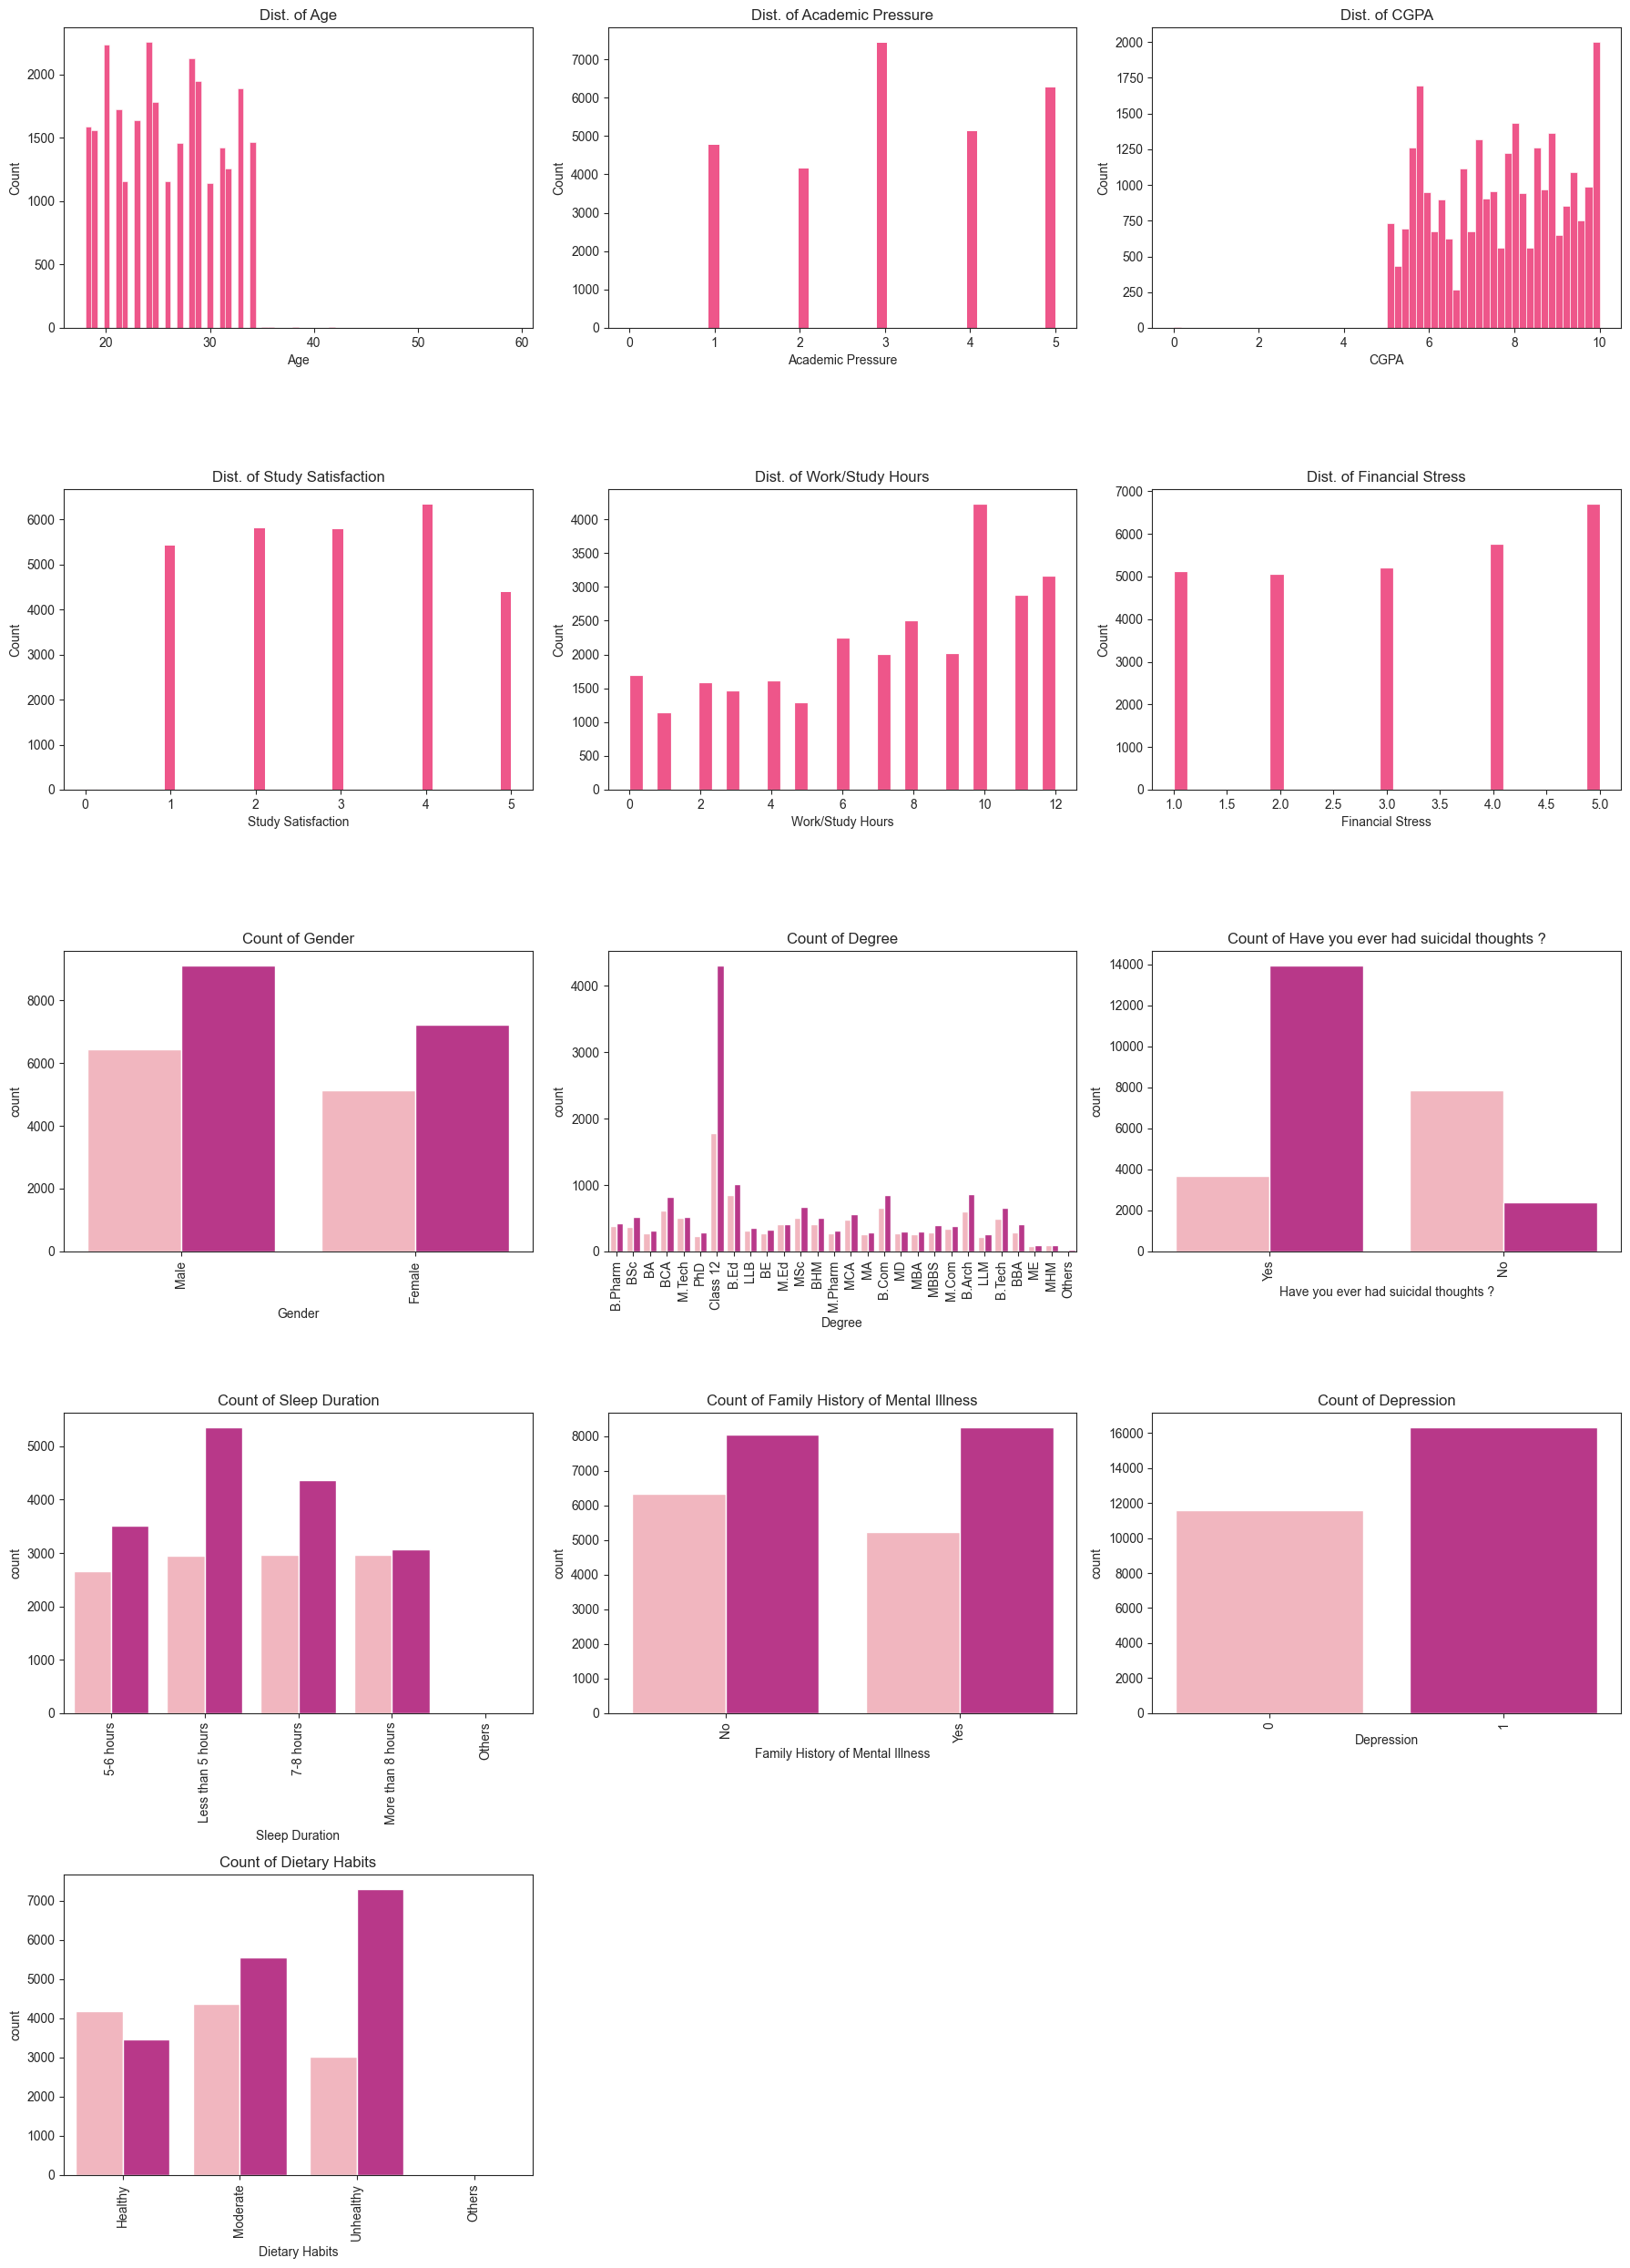

In [74]:
numerical_cols = ["Age", 'Academic Pressure', 'CGPA', 'Study Satisfaction',
                  'Work/Study Hours', 'Financial Stress']

categorical_cols = ["Gender", "Degree", 'Have you ever had suicidal thoughts ?', 'Sleep Duration',
                    'Family History of Mental Illness', 'Depression', 'Dietary Habits']
sns.set_style("ticks")

total_plots = len(numerical_cols) + len(categorical_cols)
n_cols = 3
n_rows = (total_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df_clean, x=col, ax=axes[i], color='#E91E63')
    axes[i].set_title(f'Dist. of {col}')

for j, col in enumerate(categorical_cols):
    idx = len(numerical_cols) + j
    sns.countplot(data=df_clean, x=col, ax=axes[idx], palette='RdPu', hue="Depression", legend=False)
    axes[idx].set_title(f'Count of {col}')
    axes[idx].tick_params(axis='x', rotation=90)

for k in range(total_plots, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

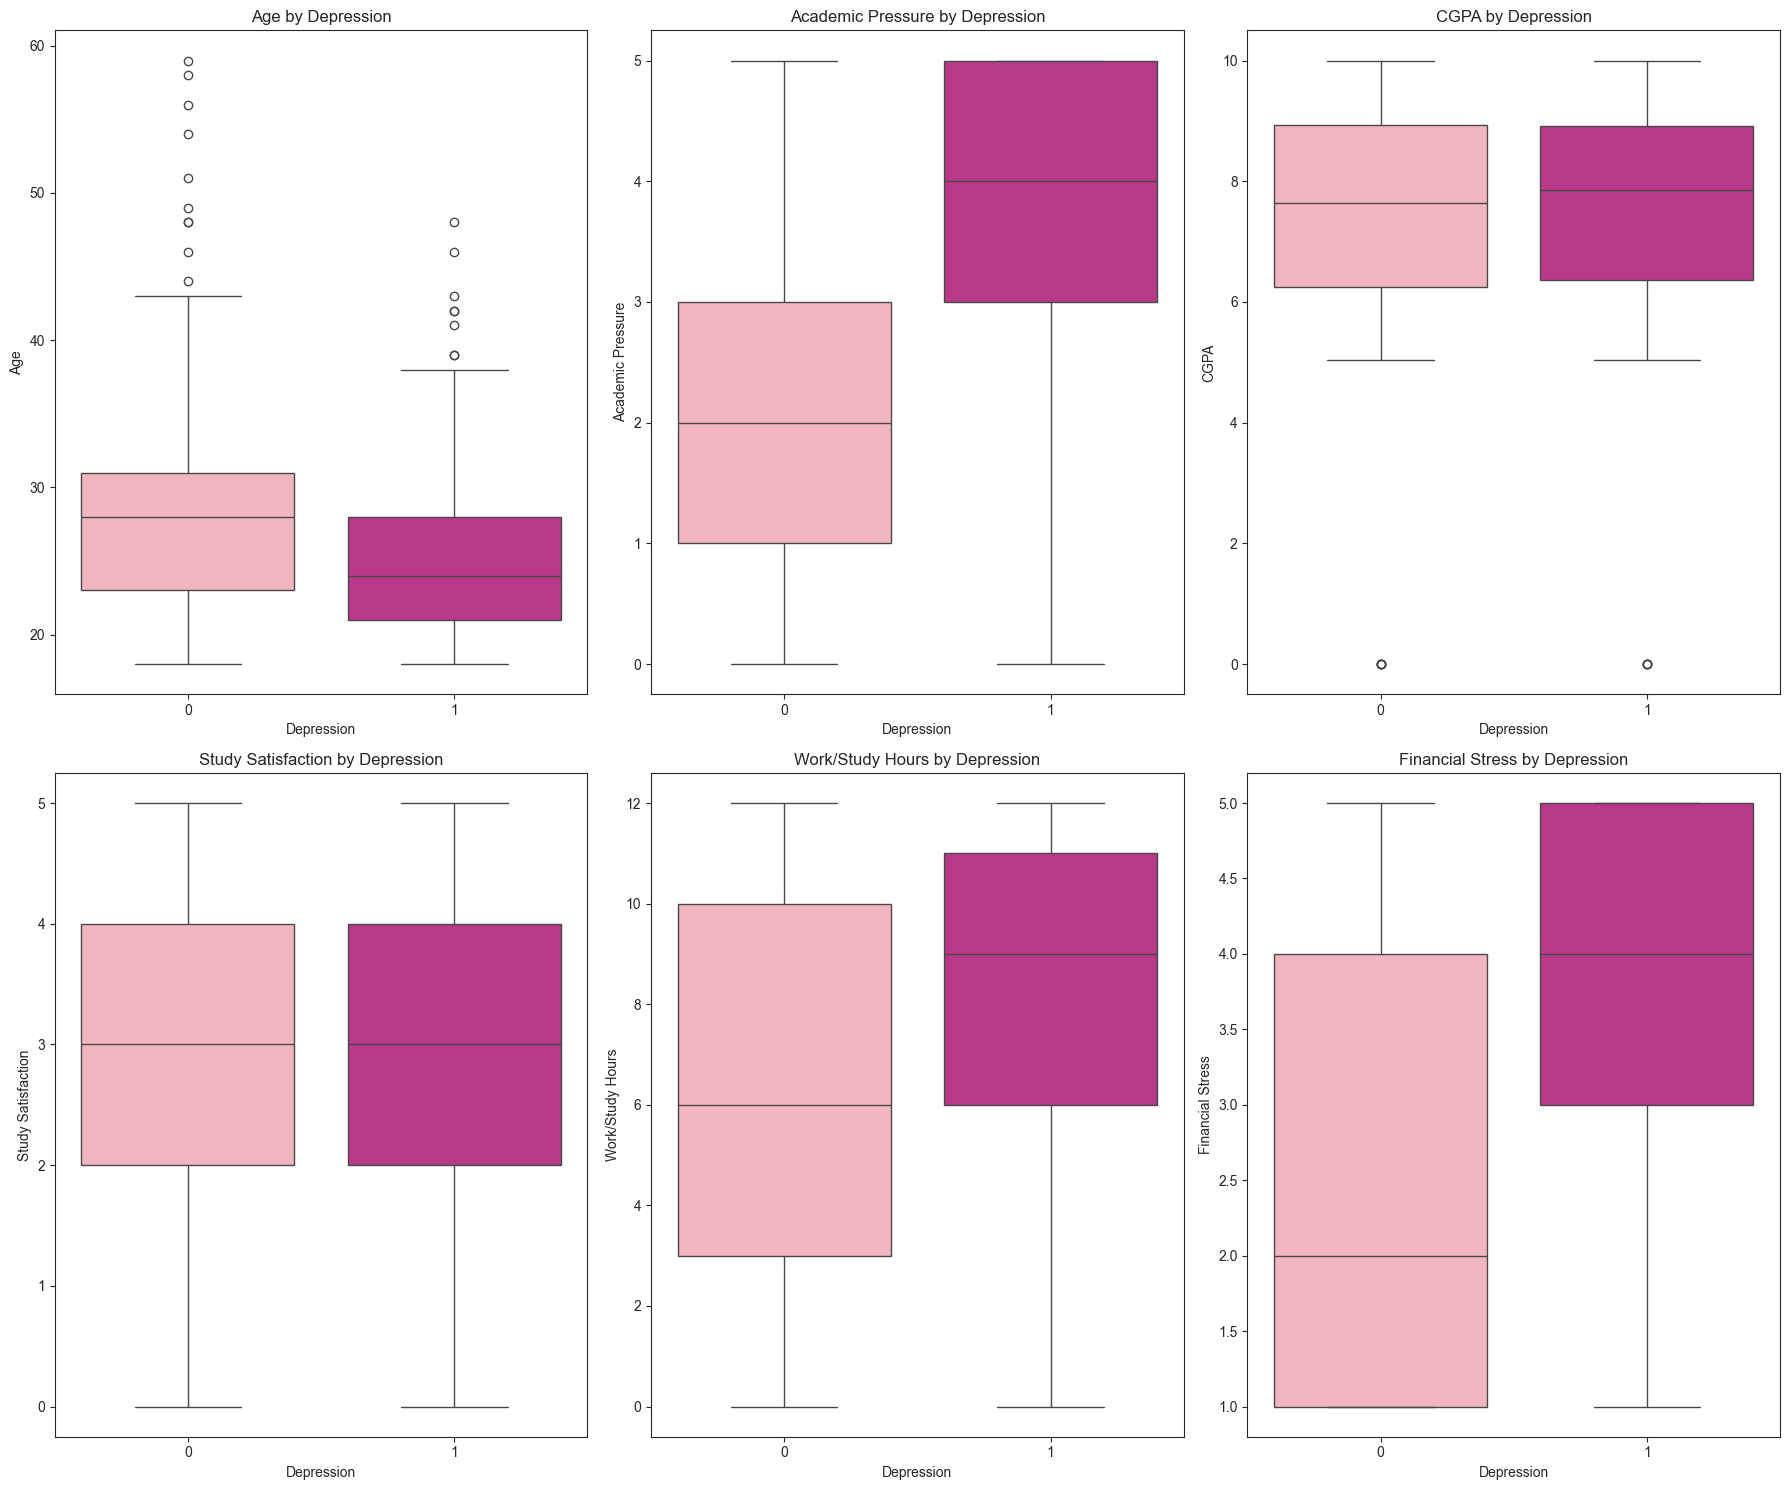

In [75]:
fig1, axes1 = plt.subplots(2, 3, figsize=(18, 15))
axes1 = axes1.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Depression', y=col, data=df, ax=axes1[i], palette='RdPu', hue="Depression", legend=False)
    axes1[i].set_title(f'{col} by Depression')

plt.tight_layout()
plt.show()

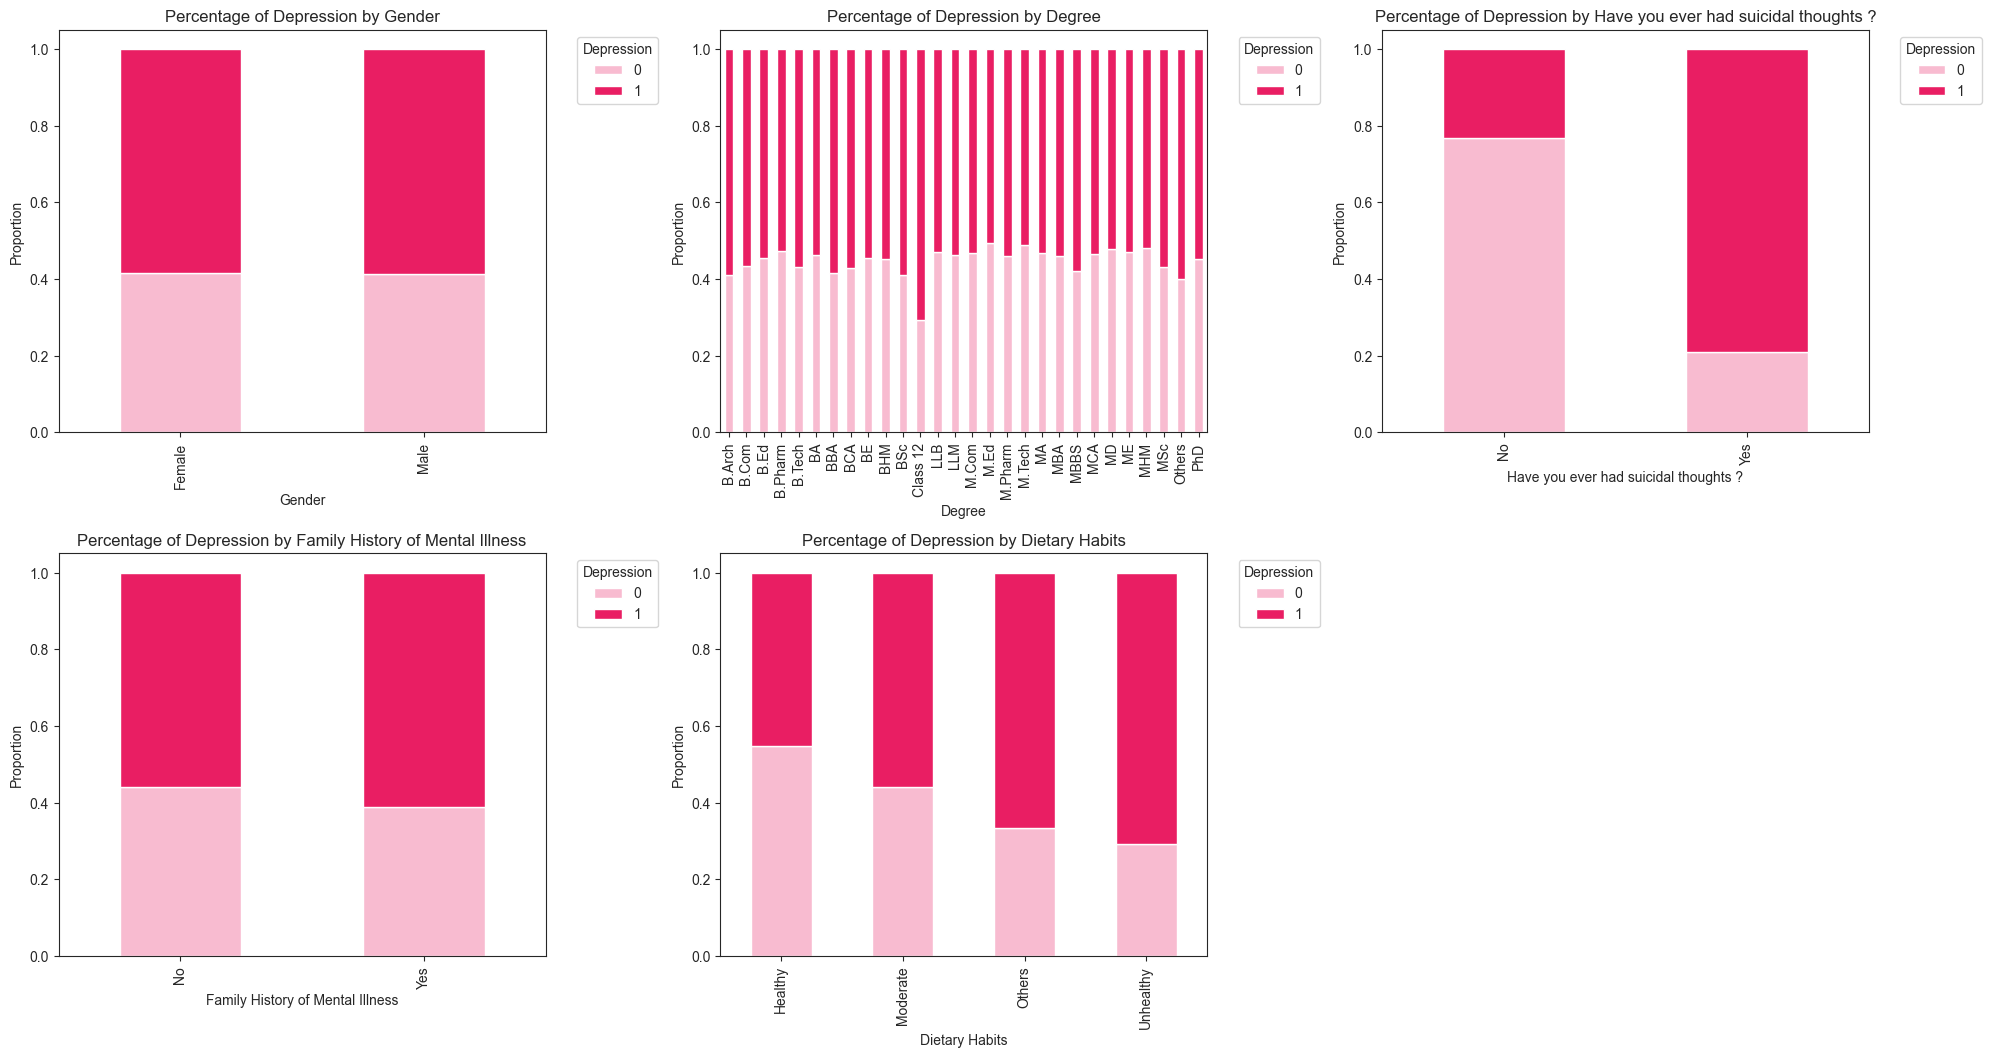

In [76]:
categorical_cols = ["Gender", "Degree", 'Have you ever had suicidal thoughts ?',
                    'Family History of Mental Illness', 'Dietary Habits']

fig2, axes2 = plt.subplots(3, 3, figsize=(20, 15))
axes2 = axes2.flatten()

for i, col in enumerate(categorical_cols):
    props = pd.crosstab(df_clean[col], df_clean['Depression'], normalize='index')

    props.plot(kind='bar', stacked=True, ax=axes2[i], color=['#F8BBD0', '#E91E63'])

    axes2[i].set_title(f'Percentage of Depression by {col}')
    axes2[i].set_ylabel('Proportion')
    axes2[i].set_xlabel(col)
    axes2[i].tick_params(axis='x', rotation=90)

    axes2[i].legend(title='Depression', bbox_to_anchor=(1.05, 1), loc='upper left')

for k in range(len(categorical_cols), len(axes2)):
    fig2.delaxes(axes2[k])

plt.tight_layout()
plt.show()

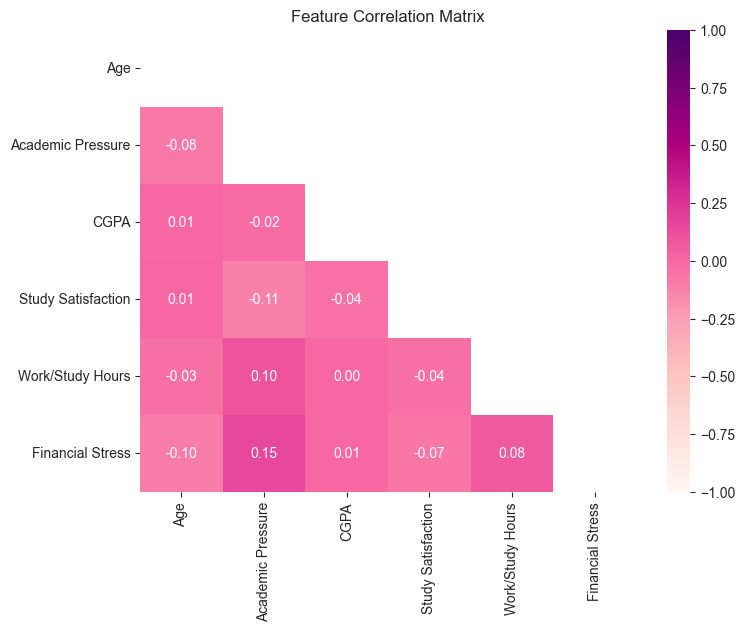

In [77]:
df_encoded = df_clean[numerical_cols]

plt.figure(figsize=(8, 6))
corr = df_encoded.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='RdPu', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')

plt.show()

# Preprocessing

In [78]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [79]:
X = df_clean.drop('Depression', axis=1)
y = df_clean['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Evaluate

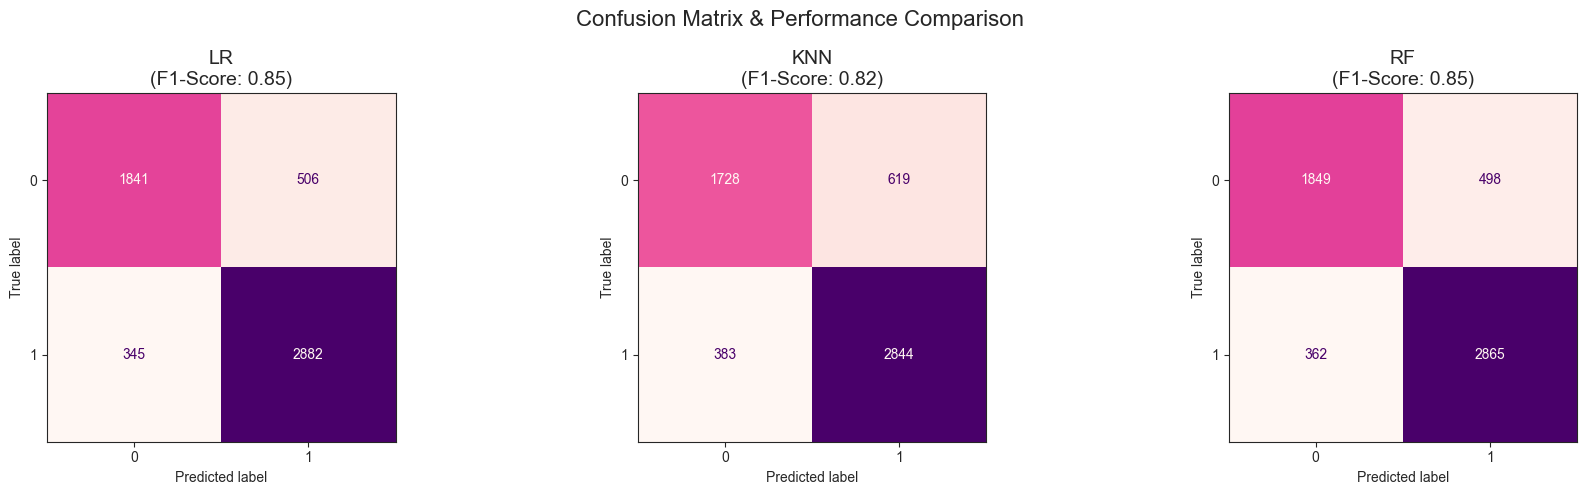


Model Performance Metrics:
  Model  Accuracy  Precision  Recall  F1 Score
0    LR    0.8473     0.8471  0.8473    0.8465
1   KNN    0.8202     0.8201  0.8202    0.8186
2    RF    0.8457     0.8453  0.8457    0.8450


In [80]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "RF": RandomForestClassifier(n_estimators=100, random_state=42)
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrix & Performance Comparison', fontsize=16)

model_metrics = []

for ax, (name, clf) in zip(axes.flat, models.items()):
    clf.fit(X_train_processed, y_train)

    y_pred = clf.predict(X_test_processed)

    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    acc = accuracy_score(y_test, y_pred)

    model_metrics.append({
        'Model': name,
        "Accuracy": acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

    disp.plot(ax=ax, cmap='RdPu', colorbar=False)

    ax.set_title(f"{name}\n(F1-Score: {f1:.2f})", fontsize=14)
    ax.grid(False)

plt.tight_layout()
plt.show()

metrics_df = pd.DataFrame(model_metrics)
print("\nModel Performance Metrics:")
print(metrics_df.round(4))

# Inference

In [92]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "RF": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_processed, y_train)
    models[name] = model

In [93]:
import pickle
for name, model in models.items():
    filename = f"models/{name}.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

In [89]:
def analyze_user_vs_population(user_input, df):
    """
    So sánh input của user với dataset và vẽ biểu đồ.

    Args:
        user_input (dict): Dữ liệu của người dùng.
        df (pd.DataFrame): Dataset gốc (chưa qua one-hot encoding).
    """

    print("\n" + "="*40)
    print(" BÁO CÁO PHÂN TÍCH NGƯỜI DÙNG VS CỘNG ĐỒNG")
    print("="*40 + "\n")

    # ---------------------------------------------------------
    # PHẦN 1: SO SÁNH SỐ HỌC (NUMERICAL) - Dùng Percentile
    # ---------------------------------------------------------
    # Danh sách các cột số có trong input của user
    numeric_cols = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
                    'Work/Study Hours', 'Financial Stress']

    # Tạo dictionary để lưu giá trị trung bình để vẽ biểu đồ sau này
    comparison_data = {'Metric': [], 'User': [], 'Average': []}

    print("--- 1. CHỈ SỐ ĐỊNH LƯỢNG (NUMERICAL) ---")
    for col in numeric_cols:
        if col in df.columns and col in user_input:
            user_val = user_input[col]
            pop_mean = df[col].mean()

            # Tính Percentile (Người dùng cao hơn bao nhiêu % dân số)
            percentile = (df[col] < user_val).mean() * 100

            print(f"- {col}:")
            print(f"  + Bạn: {user_val} | Trung bình cộng đồng: {pop_mean:.2f}")
            print(f"  + Bạn cao hơn {percentile:.1f}% sinh viên khác.")

            # Lưu dữ liệu để vẽ
            comparison_data['Metric'].append(col)
            comparison_data['User'].append(user_val)
            comparison_data['Average'].append(pop_mean)
            print("-" * 30)

    # ---------------------------------------------------------
    # PHẦN 2: SO SÁNH ĐỊNH DANH (CATEGORICAL) - Dùng Tần suất
    # ---------------------------------------------------------
    categorical_cols = ['Gender', 'Sleep Duration', 'Dietary Habits', 'Degree',
                        'Suicidal Thoughts', 'Family History of Mental Illness']

    print("\n--- 2. ĐẶC ĐIỂM ĐỊNH DANH (CATEGORICAL) ---")
    for col in categorical_cols:
        if col in df.columns and col in user_input:
            user_val = user_input[col]

            # Tính tỷ lệ phần trăm người có cùng đặc điểm
            count = df[df[col] == user_val].shape[0]
            total = df.shape[0]
            percentage = (count / total) * 100

            print(f"- {col}: '{user_val}'")
            print(f"  + Có {percentage:.1f}% sinh viên có cùng đặc điểm này với bạn.")

            # Cảnh báo nếu thuộc nhóm thiểu số (<10%)
            if percentage < 10:
                print("  => (Đây là một đặc điểm hiếm gặp/thiểu số)")

    # ---------------------------------------------------------
    # PHẦN 3: TRỰC QUAN HÓA (RADAR CHART)
    # ---------------------------------------------------------
    # Chuẩn bị dữ liệu cho Radar Chart
    # Vì các chỉ số có thang đo khác nhau (GPA thang 10, Hours thang 12, Pressure thang 5)
    # Chúng ta cần chuẩn hóa (Min-Max Scaling) về 0-1 để vẽ đẹp hơn

    categories = comparison_data['Metric']
    N = len(categories)

    # Hàm lấy giá trị đã scale
    def scale_values(values, metrics, data_frame):
        scaled = []
        for v, m in zip(values, metrics):
            min_v = data_frame[m].min()
            max_v = data_frame[m].max()
            # Công thức Min-Max: (X - Min) / (Max - Min)
            scaled.append((v - min_v) / (max_v - min_v))
        return scaled

    user_values_scaled = scale_values(comparison_data['User'], categories, df)
    avg_values_scaled = scale_values(comparison_data['Average'], categories, df)

    # Code vẽ Radar Chart
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1] # Khép kín vòng tròn

    user_values_scaled += user_values_scaled[:1]
    avg_values_scaled += avg_values_scaled[:1]

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # Vẽ trục
    plt.xticks(angles[:-1], categories, color='grey', size=10)

    # Vẽ dữ liệu User
    ax.plot(angles, user_values_scaled, linewidth=2, linestyle='solid', label='Bạn (User)', color='blue')
    ax.fill(angles, user_values_scaled, 'blue', alpha=0.1)

    # Vẽ dữ liệu Average
    ax.plot(angles, avg_values_scaled, linewidth=2, linestyle='solid', label='Trung bình cộng đồng', color='red')
    ax.fill(angles, avg_values_scaled, 'red', alpha=0.1)

    plt.title('So sánh Tổng quan: Bạn vs Cộng đồng', size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.show()

# --- CÁCH SỬ DỤNG ---
# Giả sử bạn đã có DataFrame 'df_clean' (dữ liệu gốc chưa one-hot encoding)

user_data = {
    'Gender': 'Female',
    'Age': 20,
    'Academic Pressure': 4.5,
    'CGPA': 8.5,
    'Study Satisfaction': 3.0,
    'Sleep Duration': '5-6 hours',
    'Dietary Habits': 'Unhealthy',
    'Degree': 'B.Sc',
    'Suicidal Thoughts': 'Yes',
    'Work/Study Hours': 9,
    'Financial Stress': 4,
    'Family History of Mental Illness': "Yes",
    'Have you ever had suicidal thoughts ?': "Yes"
}


 BÁO CÁO PHÂN TÍCH NGƯỜI DÙNG VS CỘNG ĐỒNG

--- 1. CHỈ SỐ ĐỊNH LƯỢNG (NUMERICAL) ---
- Age:
  + Bạn: 20 | Trung bình cộng đồng: 25.82
  + Bạn cao hơn 11.3% sinh viên khác.
------------------------------
- Academic Pressure:
  + Bạn: 4.5 | Trung bình cộng đồng: 3.14
  + Bạn cao hơn 77.4% sinh viên khác.
------------------------------
- CGPA:
  + Bạn: 8.5 | Trung bình cộng đồng: 7.66
  + Bạn cao hơn 65.0% sinh viên khác.
------------------------------
- Study Satisfaction:
  + Bạn: 3.0 | Trung bình cộng đồng: 2.94
  + Bạn cao hơn 40.5% sinh viên khác.
------------------------------
- Work/Study Hours:
  + Bạn: 9 | Trung bình cộng đồng: 7.16
  + Bạn cao hơn 55.8% sinh viên khác.
------------------------------
- Financial Stress:
  + Bạn: 4 | Trung bình cộng đồng: 3.14
  + Bạn cao hơn 55.2% sinh viên khác.
------------------------------

--- 2. ĐẶC ĐIỂM ĐỊNH DANH (CATEGORICAL) ---
- Gender: 'Female'
  + Có 44.3% sinh viên có cùng đặc điểm này với bạn.
- Sleep Duration: '5-6 hours'
  + Có 

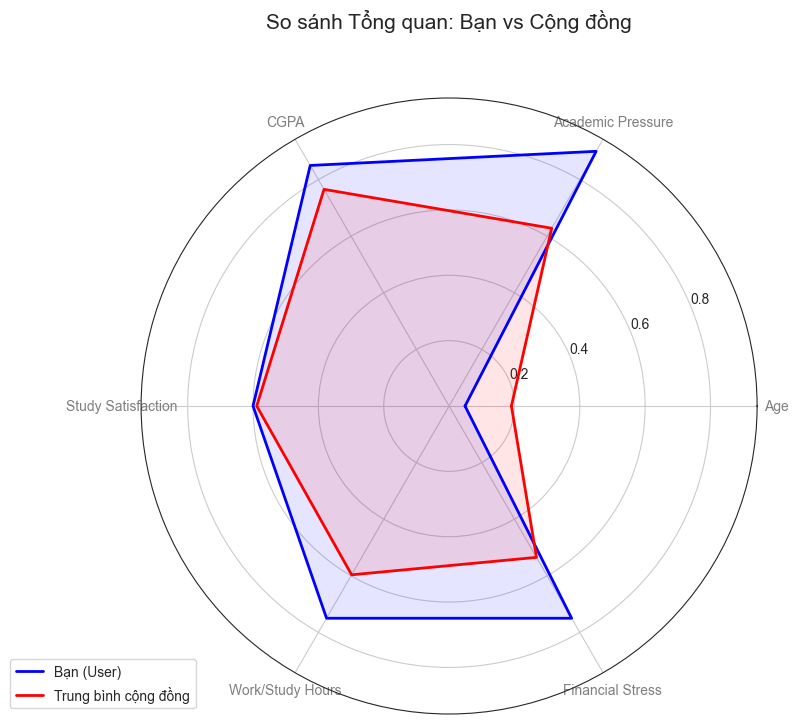

In [90]:
analyze_user_vs_population(user_data, df_clean)